Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')


Import & Explore The DATA

In [ ]:
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

# *Analysis*

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

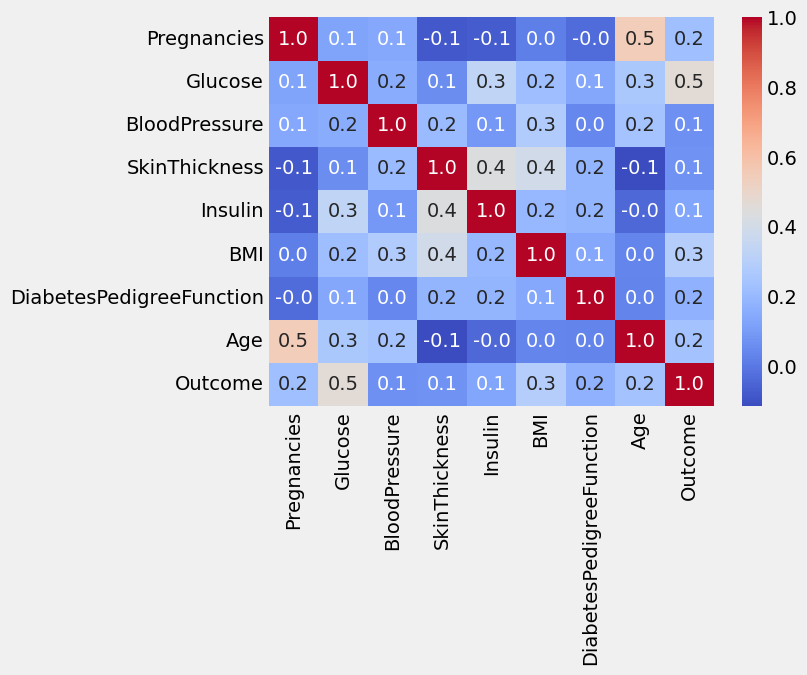

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.1f')

<ipython-input-11-2e932b93e58e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome',data=df,palette=['g','r'])


<Axes: xlabel='Outcome', ylabel='count'>

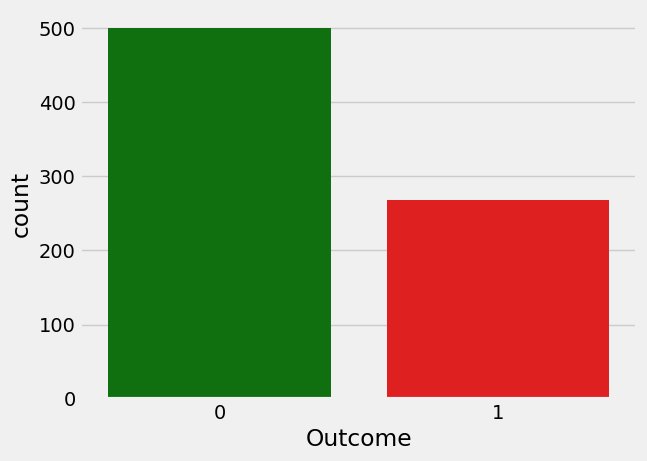

In [ ]:
sns.countplot(x='Outcome',data=df,palette=['g','r'])

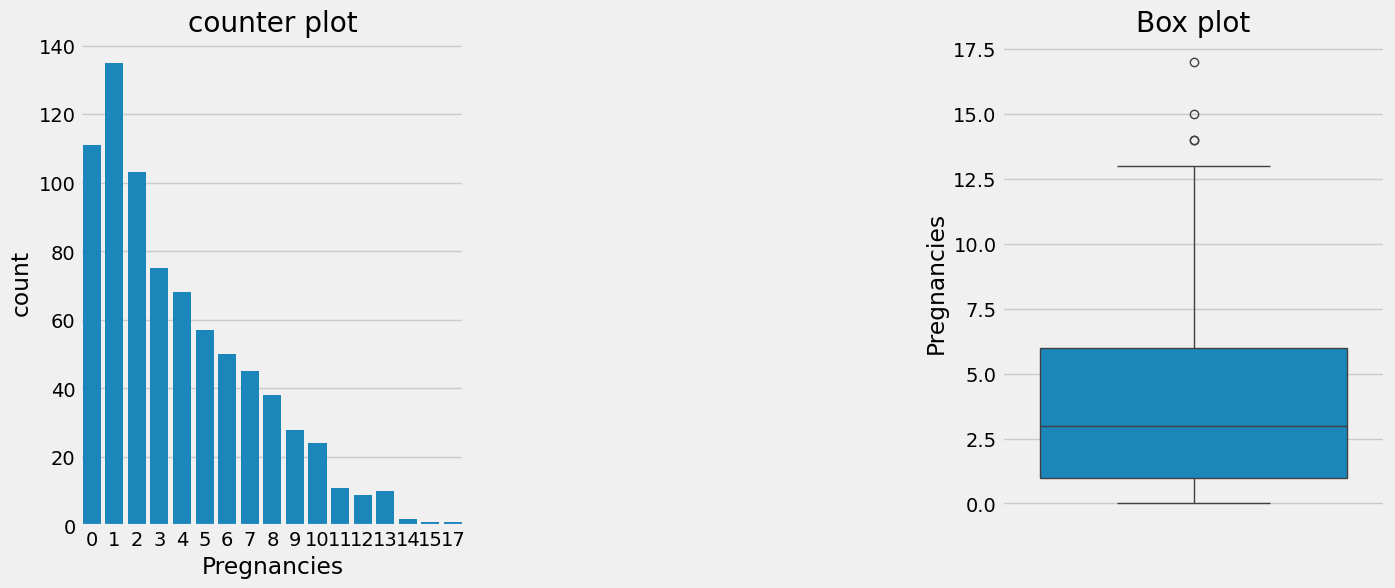

In [ ]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
plt.title('counter plot')
sns.countplot(x= 'Pregnancies',data=df)

plt.subplot(1,3,3)
plt.title('Box plot')
sns.boxplot(y= df["Pregnancies"])



plt.show()

<Axes: ylabel='Age'>

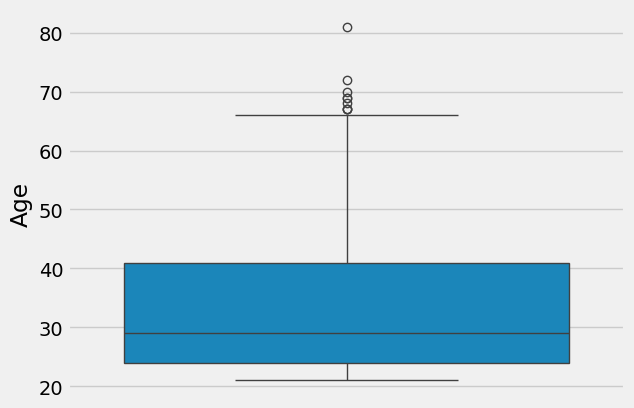

In [ ]:
sns.boxplot(df.Age)

Create Model

In [ ]:
x= df.drop('Outcome',axis=1)
y= df['Outcome']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
lr = LogisticRegression()
svm = SVC()
rf = RandomForestClassifier(n_estimators=10,max_depth=4,max_features=5 )
xgb = XGBClassifier(n_estimators=10, learning_rate=0.3, max_depth=4 )
Ada = AdaBoostClassifier(n_estimators=10, learning_rate=0.3 )

In [ ]:
columns = ['Logistic Regression','Support Vector Machine','Random Forest','XGBoost','AdaBoost']
result1=[]
result2=[]
result3=[]

LogisticRegression()
Accuracy is : 0.7291666666666666 Recall is : 0.6164383561643836 F1 score is :  0.6338028169014085


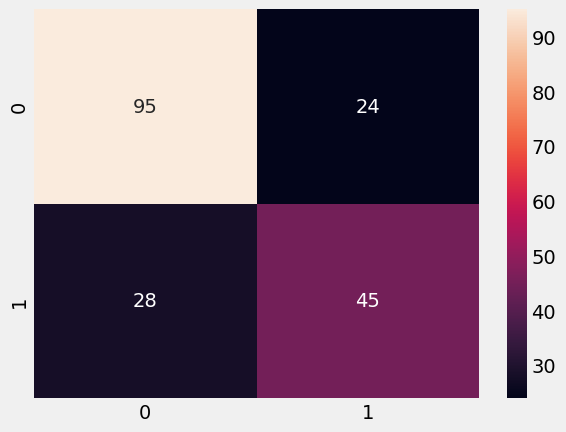

In [ ]:
def cal(model):
  model.fit(x_train,y_train)
  pred=model.predict(x_test)
  ac=accuracy_score(pred,y_test)
  rs=recall_score(pred,y_test)
  f1s=f1_score(pred,y_test)

  result1.append(ac)
  result2.append(rs)
  result3.append(f1s)
  cm=confusion_matrix(pred,y_test)
  sns.heatmap(confusion_matrix(pred,y_test),annot=True,fmt='.0f')
  print(model)
  print('Accuracy is :',ac,
        'Recall is :',rs,
  'F1 score is : ',f1s)
cal(lr)

SVC()
Accuracy is : 0.7291666666666666 Recall is : 0.6666666666666666 F1 score is :  0.5666666666666667


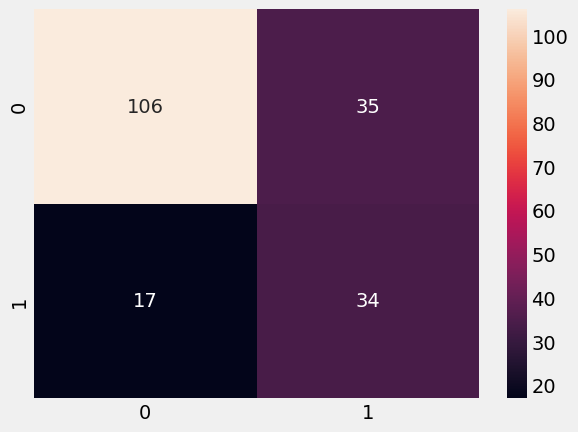

In [ ]:
cal(svm)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10)
Accuracy is : 0.734375 Recall is : 0.6363636363636364 F1 score is :  0.6222222222222222


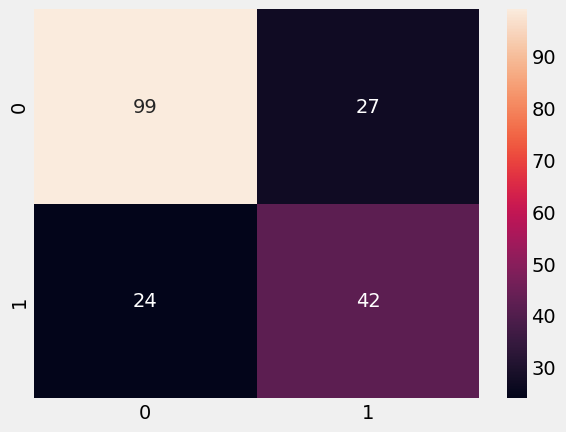

In [ ]:
cal(rf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy is : 0.7552083333333334 Recall is : 0.6571428571428571 F1 score is :  0.6618705035971223


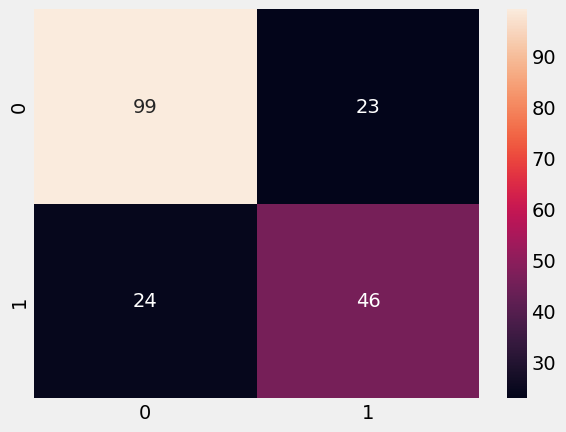

In [ ]:
cal(xgb)

AdaBoostClassifier(learning_rate=0.3, n_estimators=10)
Accuracy is : 0.7239583333333334 Recall is : 0.6538461538461539 F1 score is :  0.5619834710743802


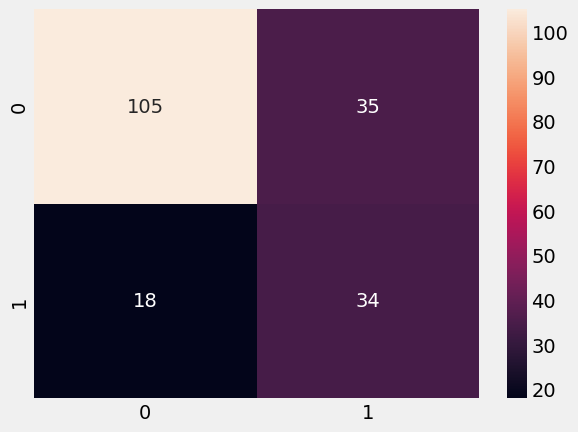

In [ ]:
cal(Ada)

In [ ]:
result=pd.DataFrame({'Algorthims':columns,'Accuracy':result1,'Recall':result2,'F1Score':result3})

In [ ]:
result

,Algorthims,Accuracy,Recall,F1Score
0,Logistic Regression,0.729167,0.616438,0.633803
1,Support Vector Machine,0.729167,0.666667,0.566667
2,Random Forest,0.734375,0.636364,0.622222
3,XGBoost,0.755208,0.657143,0.661871
4,AdaBoost,0.723958,0.653846,0.561983


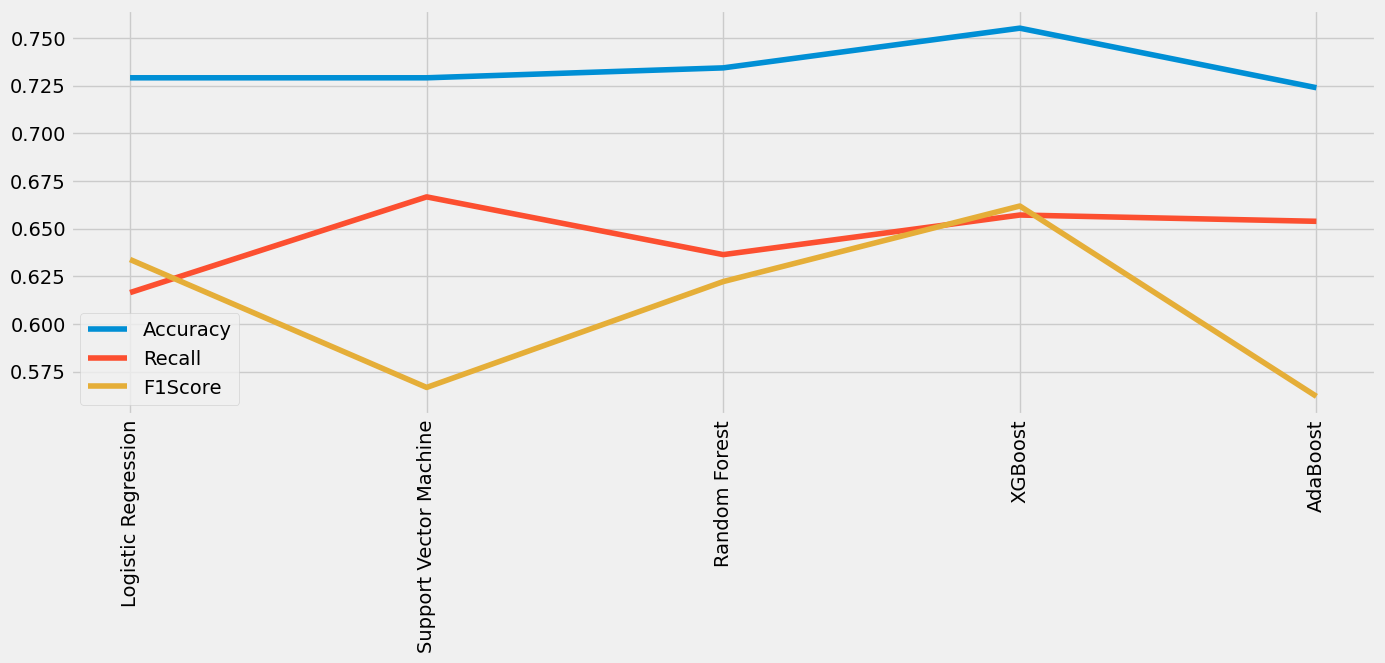

In [ ]:
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(result['Algorthims'],result['Accuracy'],label='Accuracy')
plt.plot(result['Algorthims'],result['Recall'],label='Recall')
plt.plot(result['Algorthims'],result['F1Score'],label='F1Score')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

#                             Tne Best Algorthim is XGBoost

In [ ]:
result1

[0.7291666666666666,
 0.7291666666666666,
 0.734375,
 0.7552083333333334,
 0.7239583333333334]

In [ ]:
result2

[0.6164383561643836,
 0.6666666666666666,
 0.6363636363636364,
 0.6571428571428571,
 0.6538461538461539]

In [ ]:
result3

[0.6338028169014085,
 0.5666666666666667,
 0.6222222222222222,
 0.6618705035971223,
 0.5619834710743802]

# Voitng

In [ ]:
lr = LogisticRegression()

In [ ]:
xbg = XGBClassifier(n_estimators=10, learning_rate=0.3, max_depth=4 )

In [ ]:
Ada = AdaBoostClassifier(n_estimators=10, learning_rate=0.3 )

In [ ]:
svm = SVC()

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
Voiting=VotingClassifier

In [ ]:
voiting = VotingClassifier(estimators=[('lr',lr),('xgb',xbg),('svm',svm),('Ada',Ada)],voting='hard')

In [ ]:
voiting.fit(x_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_...
                                            learning_rate=0.3, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=10, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('svm', SVC()),
                             ('Ada',
                              AdaBoostClassifier(learning_rate=0.3,
                                                 n_estimators=10))])

In [ ]:
voiting.score(x_train,y_train)

0.7881944444444444

In [ ]:
voiting.score(x_test,y_test)

0.734375